### 1.Read in the dataset personality_scores.csv in this repo. Examine the data frame for duplicates (based on ID), and drop any duplicates that exist. Assert that the new data frame is the length of the unique entries of the original data frame.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
personality_scores = pd.read_csv('data/personality_scores.csv', delimiter=';')
personality_scores.head()

,ID,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,IPIP_HIGH_RISK
0,0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
personality_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 70 columns):
ID                                                                          1555 non-null int64
Section 5 of 6 [I am always prepared.]                                      1555 non-null object
Section 5 of 6 [I am easily disturbed.]                                     1555 non-null object
Section 5 of 6 [I am exacting (demanding) in my work.]                      1555 non-null object
Section 5 of 6 [I am full of ideas.]                                        1555 non-null object
Section 5 of 6 [I am interested in people.]                                 1555 non-null object
Section 5 of 6 [I am not interested in abstract ideas.]                     1555 non-null object
Section 5 of 6 [I am not interested in other people's problems.]            1555 non-null object
Section 5 of 6 [I am not really interested in others.]                      1555 non-null object
Section 5 of 6 [I am 

In [4]:
df_personality = personality_scores.drop_duplicates()

In [5]:
df_personality.info()
personality_scores = personality_scores.drop_duplicates()
personality_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 0 to 1554
Data columns (total 70 columns):
ID                                                                          1555 non-null int64
Section 5 of 6 [I am always prepared.]                                      1555 non-null object
Section 5 of 6 [I am easily disturbed.]                                     1555 non-null object
Section 5 of 6 [I am exacting (demanding) in my work.]                      1555 non-null object
Section 5 of 6 [I am full of ideas.]                                        1555 non-null object
Section 5 of 6 [I am interested in people.]                                 1555 non-null object
Section 5 of 6 [I am not interested in abstract ideas.]                     1555 non-null object
Section 5 of 6 [I am not interested in other people's problems.]            1555 non-null object
Section 5 of 6 [I am not really interested in others.]                      1555 non-null object
Section 5 of 6 [I am 

In [6]:
personality_scores.dropna(axis=1, inplace = True)

In [7]:
personality_scores.set_index('ID', inplace=True)

#### There are no duplicates as the number of rows remain the same after I have applied the drop_duplicates method

In [8]:
assert len(personality_scores)==len(df_personality)

#### The new data frame is the length of the unique entries of the original data frame.

### 2. Write functions that will (1) convert the answer on each of the personality test questions to a number, as set out in scoring, and (2) calculate total scores for each of the subscales (conscientiousness, emotional stability, openness to new experience, agreeableness, extraversion). As you are doing this, first create unit tests that will test that the functions work as they should.

In [9]:
def convertString(row):
    sumExtraversion = 0
    sumAgreeableness = 0
    sumConscientiousness = 0
    sumEmotional = 0
    sumIntellect = 0

    for values in row:
        if values[1]=='1':
            sumExtraversion+=int(values[4])
        if values[1]=='2':
            sumAgreeableness+=int(values[4])
        if values[1]=='3':
            sumConscientiousness+=int(values[4])
        if values[1]=='4':
            sumEmotional+=int(values[4])
        if values[1]=='5':
            sumIntellect+=int(values[4])

    return [sumExtraversion, sumAgreeableness, sumConscientiousness, sumEmotional, sumIntellect]

In [41]:
a = personality_scores.apply(convertString, axis=1)
lst_personality = list(a) 

TypeError: ("'int' object is not subscriptable", 'occurred at index 0')

In [11]:
def createColumn(lst):
    Extraversion = []
    Agreeableness = []
    Conscientiousness = []
    Emotional = []
    Intellect = []
    
    for values in lst:
        Extraversion.append(values[0])
        Agreeableness.append(values[1])
        Conscientiousness.append(values[2])
        Emotional.append(values[3])
        Intellect.append(values[4])
        
    return [Extraversion, Agreeableness, Conscientiousness, Emotional, Intellect]

In [12]:
x = createColumn(lst_personality)

In [13]:
personality_scores['Extraversion']=x[0]
personality_scores['Agreeableness']=x[1]
personality_scores['Conscientiousness']=x[2]
personality_scores['Emotional Stability']=x[3]
personality_scores['Intellect']=x[4]

personality_scores.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Section 5 of 6 [I sympathize with others' feelings.],Section 5 of 6 [I take time out for others.],Section 5 of 6 [I talk to a lot of different people at parties.],Section 5 of 6 [I use difficult words.],Section 5 of 6 [I worry about things.],Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Intellect
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,"(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)",30,40,48,36,42
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,"(2, 5)","(2, 5)","(1, 5)","(5, 3)","(4, 3)",42,46,46,40,42
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,"(2, 5)","(2, 5)","(1, 3)","(5, 1)","(4, 3)",28,40,40,38,42
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,"(2, 5)","(2, 5)","(1, 5)","(5, 1)","(4, 1)",30,38,38,40,38
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,"(2, 3)","(2, 5)","(1, 3)","(5, 1)","(4, 3)",28,34,46,38,36


### 1. Create a function/functions that takes in subscale total, and for each subscale, creates a new column called “{subscale_name}_interpretation” (e.g., conscientiousness_interpretation) and applies the labels “low”, “medium”, or “high” according to a person’s score on that subscale. Cut-off scores corresponding to the low, medium and high groups can be found in scoring.md. Again, write a unit test before creating this function that tests whether the generate_score_interpretation function works.



In [14]:
def interpertation(column):
    mean = personality_scores[column].mean()
    std_d = personality_scores[column].std()

    lst=[]
    for values in personality_scores[column]:
        if values >= (mean + std_d)/2:
            lst.append("high")
        elif values <= (mean - std_d)/2:
            lst.append("low")
        else:
            lst.append("medium")
    return lst

In [15]:
personality_scores['Extraversion Interpretation'] =  interpertation('Extraversion')
personality_scores['Agreeableness Interpretation'] =  interpertation( 'Agreeableness')
personality_scores['Conscientiousness Interpretation'] =  interpertation( 'Conscientiousness')
personality_scores['Emotional Stability Interpretation'] =  interpertation('Emotional Stability')
personality_scores['Intellect Interpretation'] =  interpertation('Intellect')


In [16]:
personality_scores.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Intellect,Extraversion Interpretation,Agreeableness Interpretation,Conscientiousness Interpretation,Emotional Stability Interpretation,Intellect Interpretation
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,30,40,48,36,42,high,high,high,high,high
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,42,46,46,40,42,high,high,high,high,high
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,28,40,40,38,42,high,high,high,high,high
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,30,38,38,40,38,high,high,high,high,high
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,28,34,46,38,36,high,high,high,high,high


### 4. Read in the data in departments.csv and merge this data frame with the personality score data frame, keeping all applicants within the department data frame. Assert that the newly created merged data frame has the same amount of rows as the department data frame, and the expected number of columns.

In [17]:
departments_df = pd.read_csv('data/departments.csv', delimiter=';')
departments_df.set_index('ID', inplace=True)
departments_df = departments_df.replace(to_replace ='d', value = 'D', regex = True) 
departments_df.head()

,Department,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,IPIP_HIGH_RISK
ID,,,,,,,,,,,,,,,,,,,,
0,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
new_df = pd.concat([personality_scores, departments_df], axis=1).dropna(axis=1)
new_df.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Agreeableness,Conscientiousness,Emotional Stability,Intellect,Extraversion Interpretation,Agreeableness Interpretation,Conscientiousness Interpretation,Emotional Stability Interpretation,Intellect Interpretation,Department
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,40,48,36,42,high,high,high,high,high,Data
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,46,46,40,42,high,high,high,high,high,Data
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,40,40,38,42,high,high,high,high,high,Data
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,38,38,40,38,high,high,high,high,high,Data
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,34,46,38,36,high,high,high,high,high,Data


### 3. Create histograms of personality scores by department. You may need to clean some of the department names.

In [19]:
def graph(Department, Subscale):
    a = new_df[new_df['Department']== Department][Subscale]
    return a

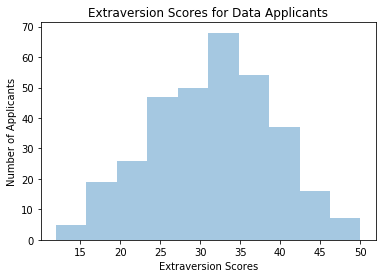

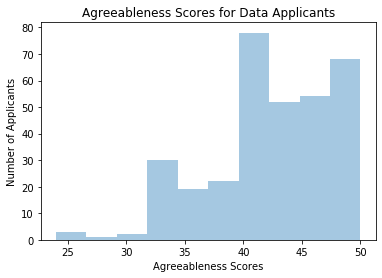

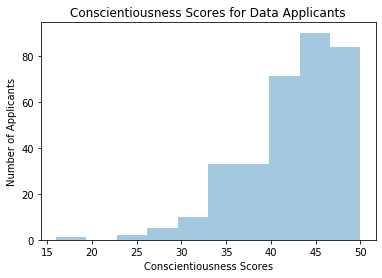

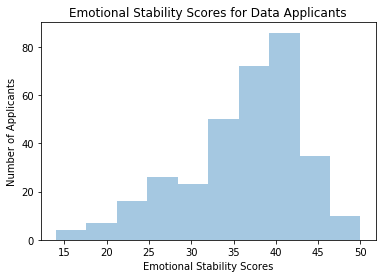

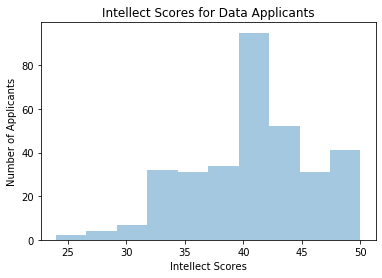

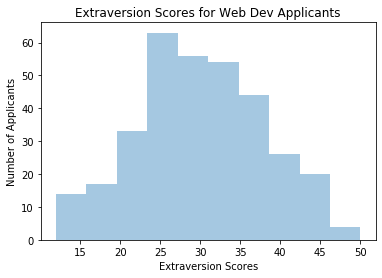

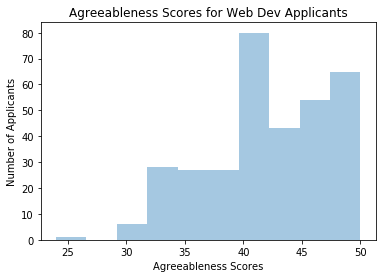

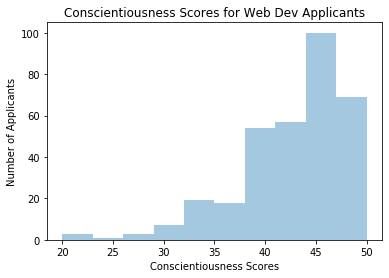

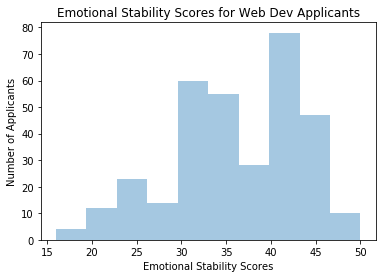

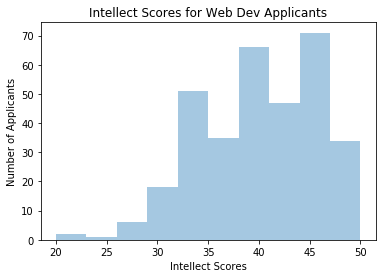

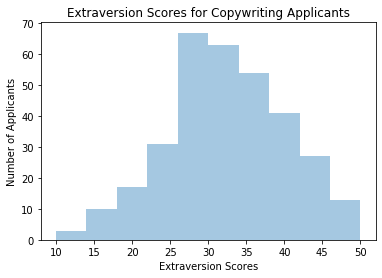

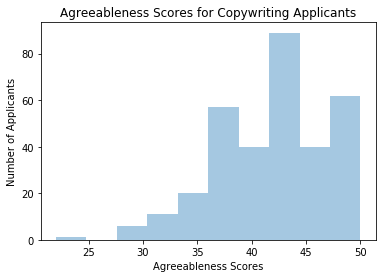

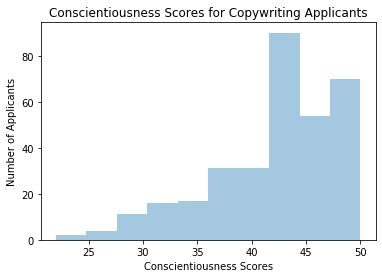

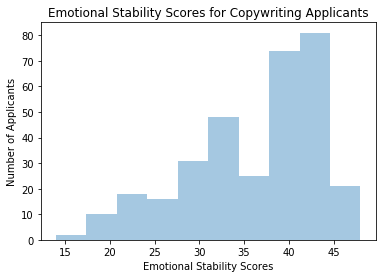

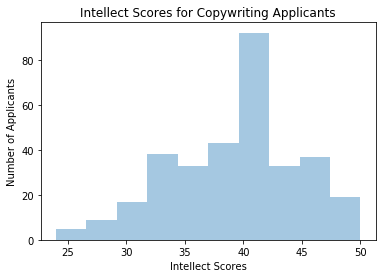

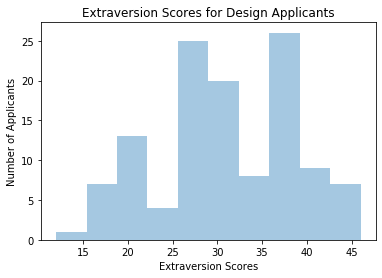

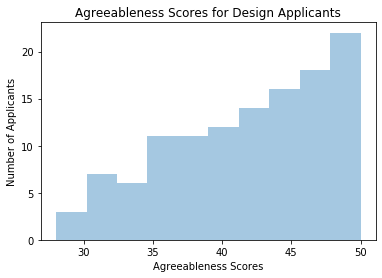

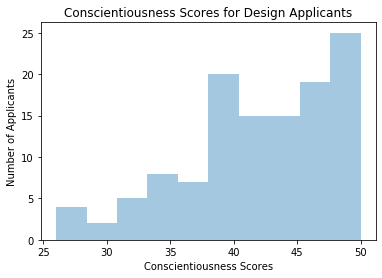

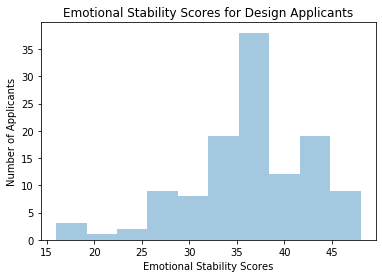

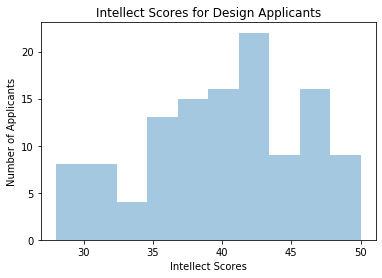

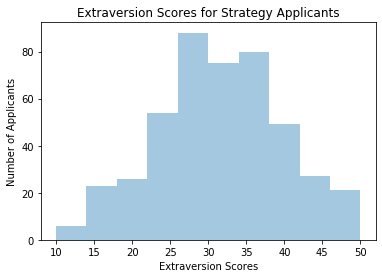

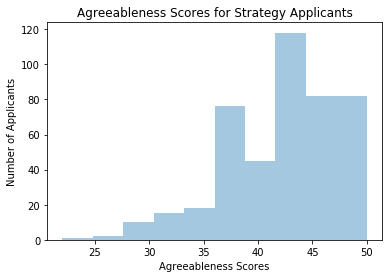

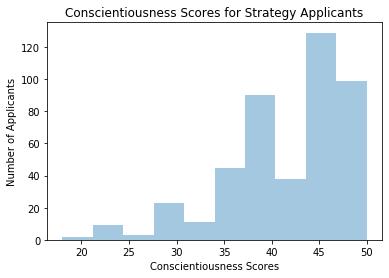

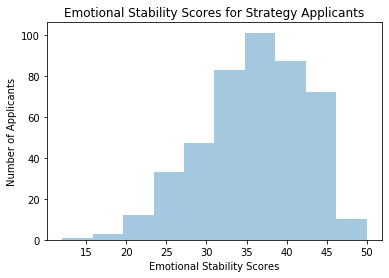

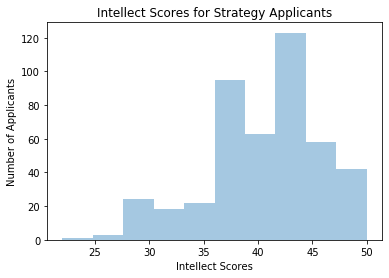

In [20]:
def plotGraph():
    arrySubscale = ['Data', 'Web Dev', 'Copywriting', 'Design', 'Strategy']
    arryTrait = ['Extraversion','Agreeableness', 'Conscientiousness', 'Emotional Stability', 'Intellect']
    for i in arrySubscale:
        for j in arryTrait:
            sns.distplot(graph(i,j), bins=10, kde=False)
            plt.title('{} Scores for {} Applicants'.format(j,i))
            plt.ylabel('Number of Applicants')
            plt.xlabel('{} Scores'.format(j))
            plt.show()

plotGraph()            

#### When it  comes to Extraversion across all departments there is an even distribution of data. Therefore, there's a balance between the amount of people who are introverts vs extroverts. The other personality traits have data skewed to the right. Therefore, there are are more people who score higher in the other personality traits.

### 4. Filter the merged data frame so that you get only the ID numbers of applicants who score “low” on emotional stability, conscientiousness or agreeableness. Print the ID numbers and departments of these applicants to the screen, and also assign these applicants the tag “high_risk” in a new column.

In [21]:
df = new_df[(new_df['Emotional Stability Interpretation']=='low') | (new_df['Conscientiousness Interpretation']=='low') |(new_df['Agreeableness Interpretation']=='low')]['Department']
df = pd.DataFrame(df)
print('ID numbers of applicants who score “low” on emotional stability, conscientiousness or agreeableness:{}'.format(list(df.index)))
df['High Risk'] = 'high_risk'
assert len(df)==7
print(len(df))
df

ID numbers of applicants who score “low” on emotional stability, conscientiousness or agreeableness:[18, 27, 526, 584, 663, 960, 1154]
7


,Department,High Risk
ID,,
18,Data,high_risk
27,Data,high_risk
526,Strategy,high_risk
584,Strategy,high_risk
663,Strategy,high_risk
960,Data,high_risk
1154,Copywriting,high_risk


In [22]:
risk_df = pd.concat([new_df, df['High Risk']], axis=1)
risk_df.fillna('not_specified', inplace=True)
risk_df['High Risk'].unique()
risk_df.head()

,Section 5 of 6 [I am always prepared.],Section 5 of 6 [I am easily disturbed.],Section 5 of 6 [I am exacting (demanding) in my work.],Section 5 of 6 [I am full of ideas.],Section 5 of 6 [I am interested in people.],Section 5 of 6 [I am not interested in abstract ideas.],Section 5 of 6 [I am not interested in other people's problems.],Section 5 of 6 [I am not really interested in others.],Section 5 of 6 [I am quick to understand things.],Section 5 of 6 [I am quiet around strangers.],...,Conscientiousness,Emotional Stability,Intellect,Extraversion Interpretation,Agreeableness Interpretation,Conscientiousness Interpretation,Emotional Stability Interpretation,Intellect Interpretation,Department,High Risk
ID,,,,,,,,,,,,,,,,,,,,,
0,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 3)","(5, 3)","(2, 3)","(2, 5)","(5, 5)","(1, 3)",...,48,36,42,high,high,high,high,high,Data,not_specified
1,"(3, 5)","(4, 5)","(3, 5)","(5, 5)","(2, 5)","(5, 3)","(2, 5)","(2, 5)","(5, 5)","(1, 3)",...,46,40,42,high,high,high,high,high,Data,not_specified
2,"(3, 5)","(4, 3)","(3, 3)","(5, 5)","(2, 5)","(5, 5)","(2, 5)","(2, 5)","(5, 5)","(1, 1)",...,40,38,42,high,high,high,high,high,Data,not_specified
3,"(3, 5)","(4, 5)","(3, 3)","(5, 5)","(2, 5)","(5, 3)","(2, 3)","(2, 3)","(5, 3)","(1, 3)",...,38,40,38,high,high,high,high,high,Data,not_specified
4,"(3, 3)","(4, 5)","(3, 3)","(5, 3)","(2, 3)","(5, 3)","(2, 3)","(2, 3)","(5, 5)","(1, 1)",...,46,38,36,high,high,high,high,high,Data,not_specified


### 5. Create a new data frame with a count of the number of applicants in the low risk group within each personality subscale and department. Let each department be a separate column, and each personality subscale be a separate row. 

In [23]:
lowrisk_df = risk_df.iloc[ : , [-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2] ]
lowrisk_df.head()

,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Intellect,Extraversion Interpretation,Agreeableness Interpretation,Conscientiousness Interpretation,Emotional Stability Interpretation,Intellect Interpretation,Department
ID,,,,,,,,,,,
0,30,40,48,36,42,high,high,high,high,high,Data
1,42,46,46,40,42,high,high,high,high,high,Data
2,28,40,40,38,42,high,high,high,high,high,Data
3,30,38,38,40,38,high,high,high,high,high,Data
4,28,34,46,38,36,high,high,high,high,high,Data


In [24]:
inter = ['Extraversion Interpretation','Agreeableness Interpretation','Conscientiousness Interpretation','Emotional Stability Interpretation','Intellect Interpretation']
trait = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Intellect']

In [25]:
lowww_df = pd.DataFrame()

In [26]:

for i,j in zip(inter,trait):
    
    loww_df = pd.pivot_table(lowrisk_df,index = i,columns="Department",values= j, aggfunc='count', fill_value=0)
    loww_df.reset_index(inplace=True)
    loww_df['Subscale'] = i
    loww_df.rename(columns={i: ""},inplace=True)
    loww_df = loww_df.set_index(['Subscale',''])
    lowww_df = pd.concat([lowww_df,loww_df])



In [27]:
lowww_df.loc[(slice(None), 'low'), :]

,Department,Copywriting,Data,Design,Strategy,Web Dev
Subscale,,,,,,
Extraversion Interpretation,low,1,0,0,2,0
Conscientiousness Interpretation,low,0,1,0,2,0
Emotional Stability Interpretation,low,1,2,0,1,0


#### From this table we can see that the only subscales where they scored low is Extraversion Interpretation, Conscientiousness Interpretation, Emotional Stability Interpretation. Design didn't have any people who scored low and Strategy had the most people to score low. 

### Here I am unit tests for all my functions

In [28]:
# def assert_functions():
#     """function running assertions for all my functions"""
#     assert convertString(test_df) == 
#     assert createColumn(lst) ==
#     assert interpertation(column) ==
#     assert graph(Department, Subscale) ==
  

In [35]:
test_df =personality_scores.loc[[0]]
test_df

[0, 0, 0, 0, 0]